In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import ffmpeg
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from tqdm.notebook import tqdm
from audio_functions import *

In [3]:
# Replace 'input.mkv' with your input file path
input_file = 'LOCK.mkv'
output_left_file = 'LOCK_left.wav'
output_right_file = 'LOCK_right.wav'

# Extract audio directly into NumPy array
audio_np_array = extract_audio(input_file)

# Assuming interleaved stereo audio, split the array into left and right channels
left_audio = audio_np_array[::2]
right_audio = audio_np_array[1::2]

# Save left and right audio arrays to files
save_audio_to_file(left_audio, output_left_file)
save_audio_to_file(right_audio, output_right_file)


Audio saved to LOCK_left.wav
Audio saved to LOCK_right.wav


In [4]:
# Load left and right audio arrays from files
left_audio = load_audio_from_file(output_left_file)
right_audio = load_audio_from_file(output_right_file)

# Display the shapes of the NumPy arrays
print("Left audio shape:", left_audio.shape)
print("Right audio shape:", right_audio.shape)

Left audio shape: (78947475,)
Right audio shape: (78947475,)


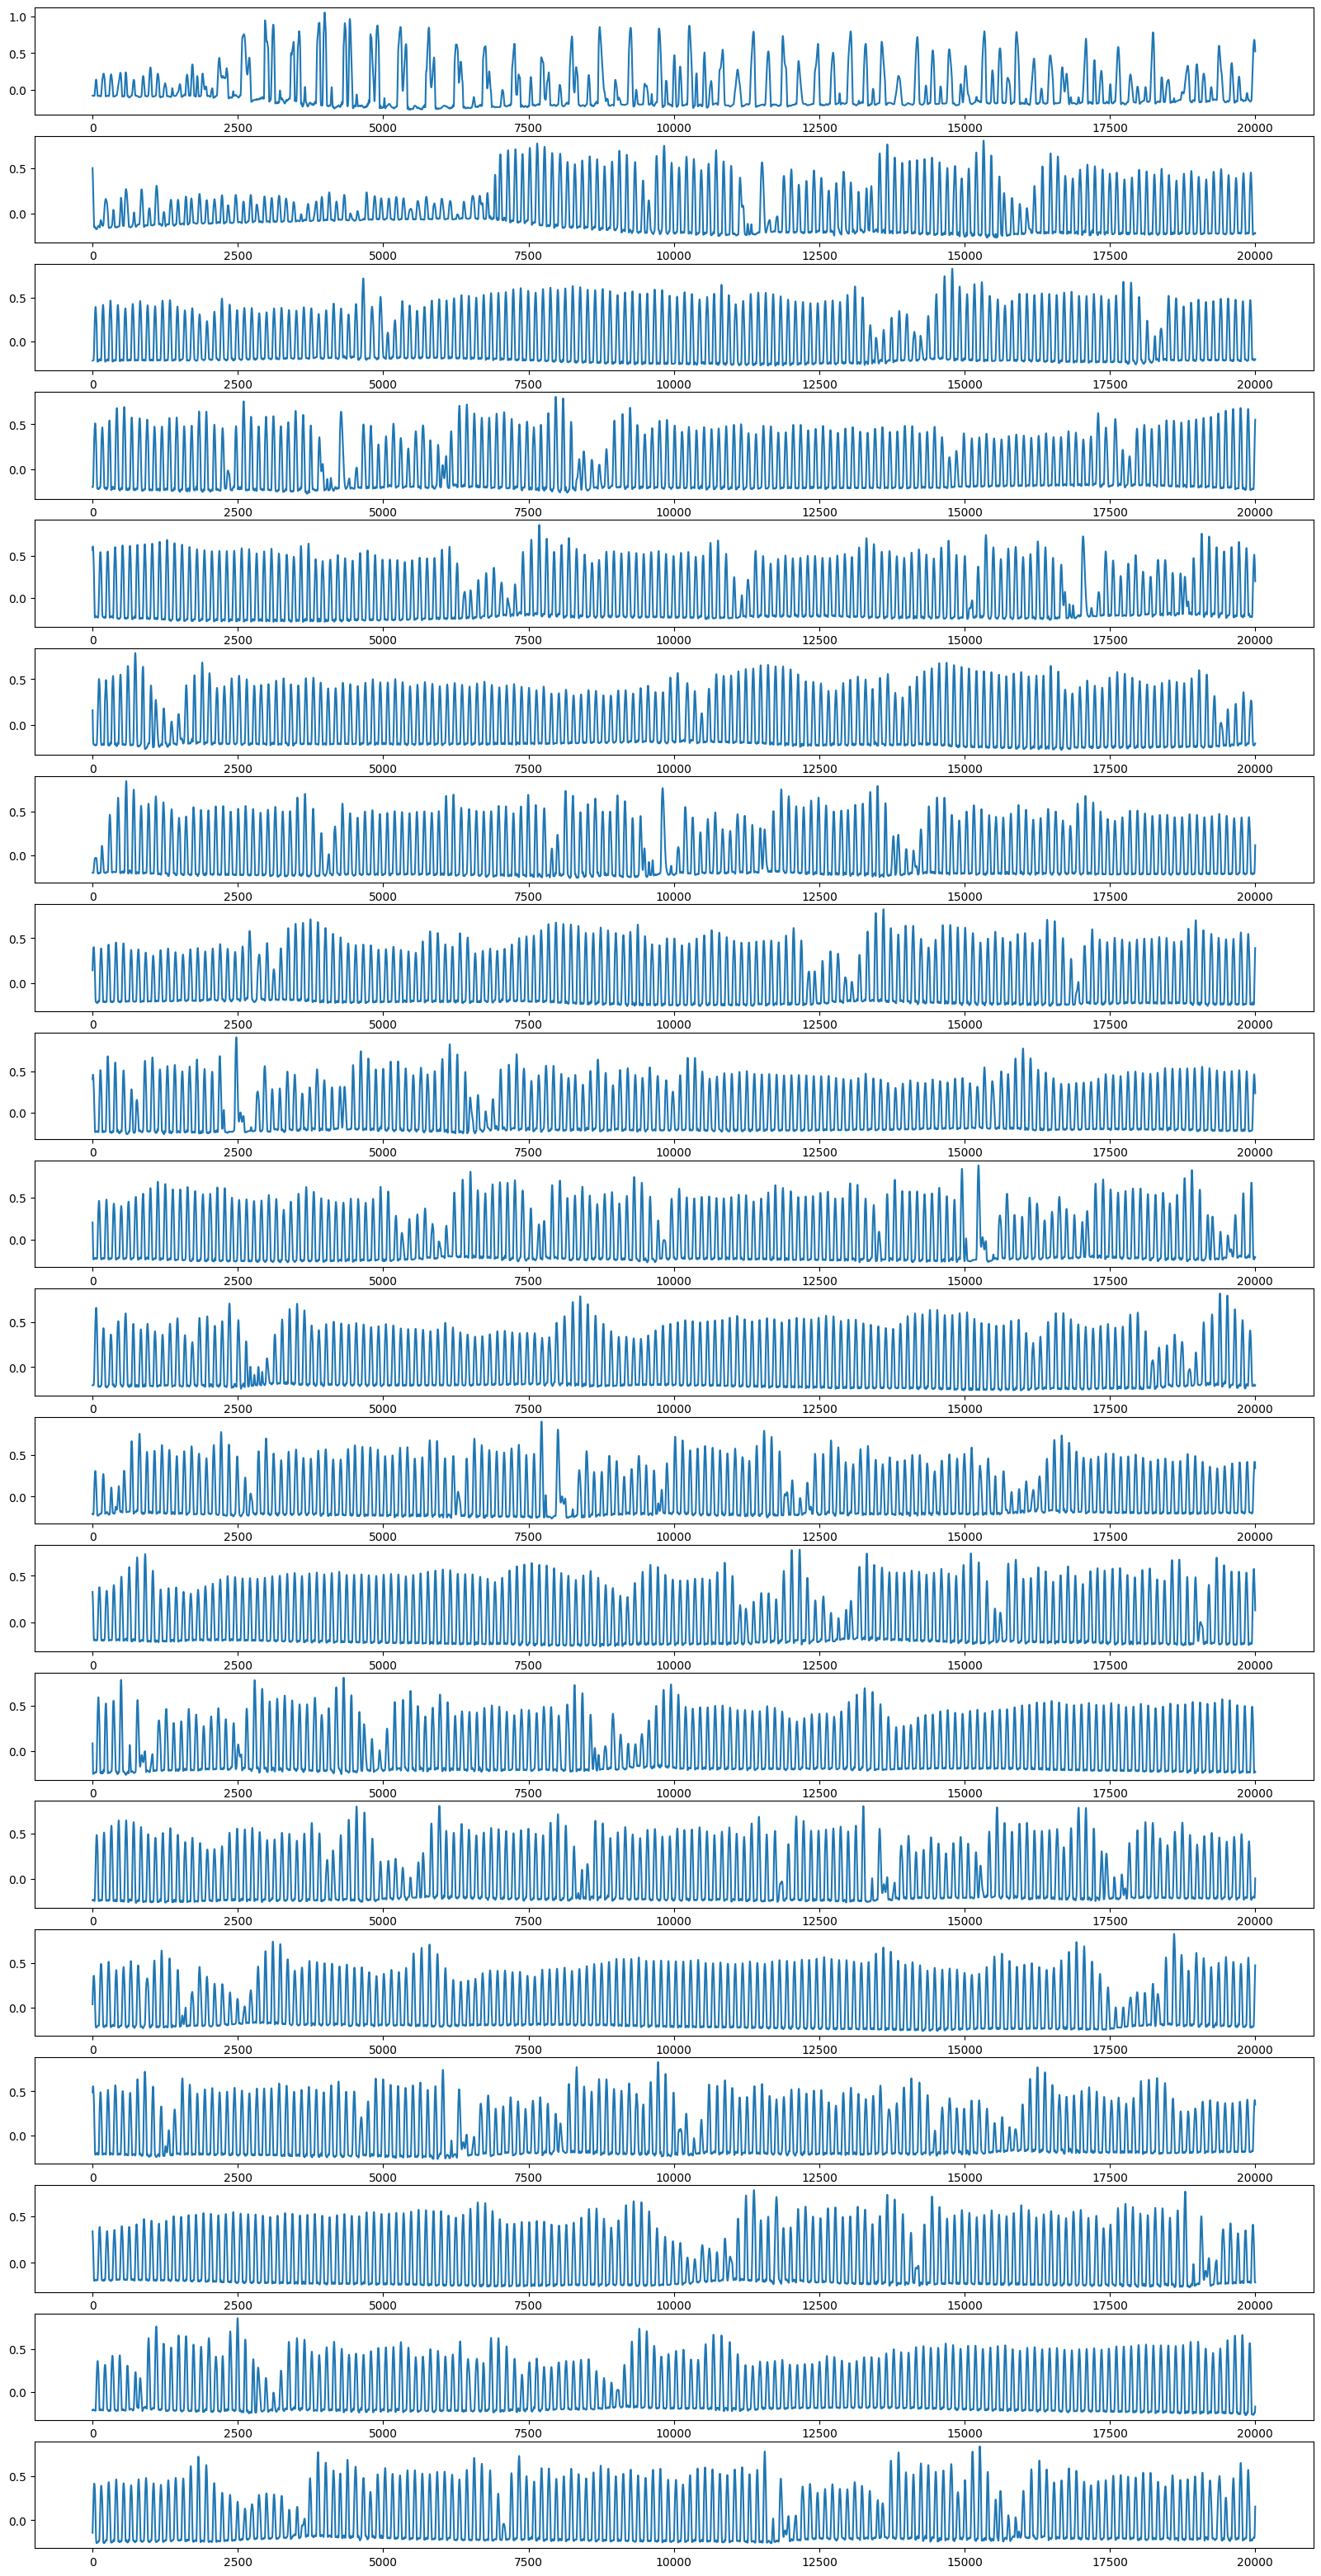

In [5]:
rows = 20
fig, axs = plt.subplots(nrows=rows,figsize=(20,2*rows))
factor = 20000
offset = 200000*8
for i, ax in enumerate(axs):
    a1 = i*factor + offset
    ax.plot(left_audio[a1:a1+factor])

chunk_size=128, len(arr_sliced)=199936
128


127.9404609475032

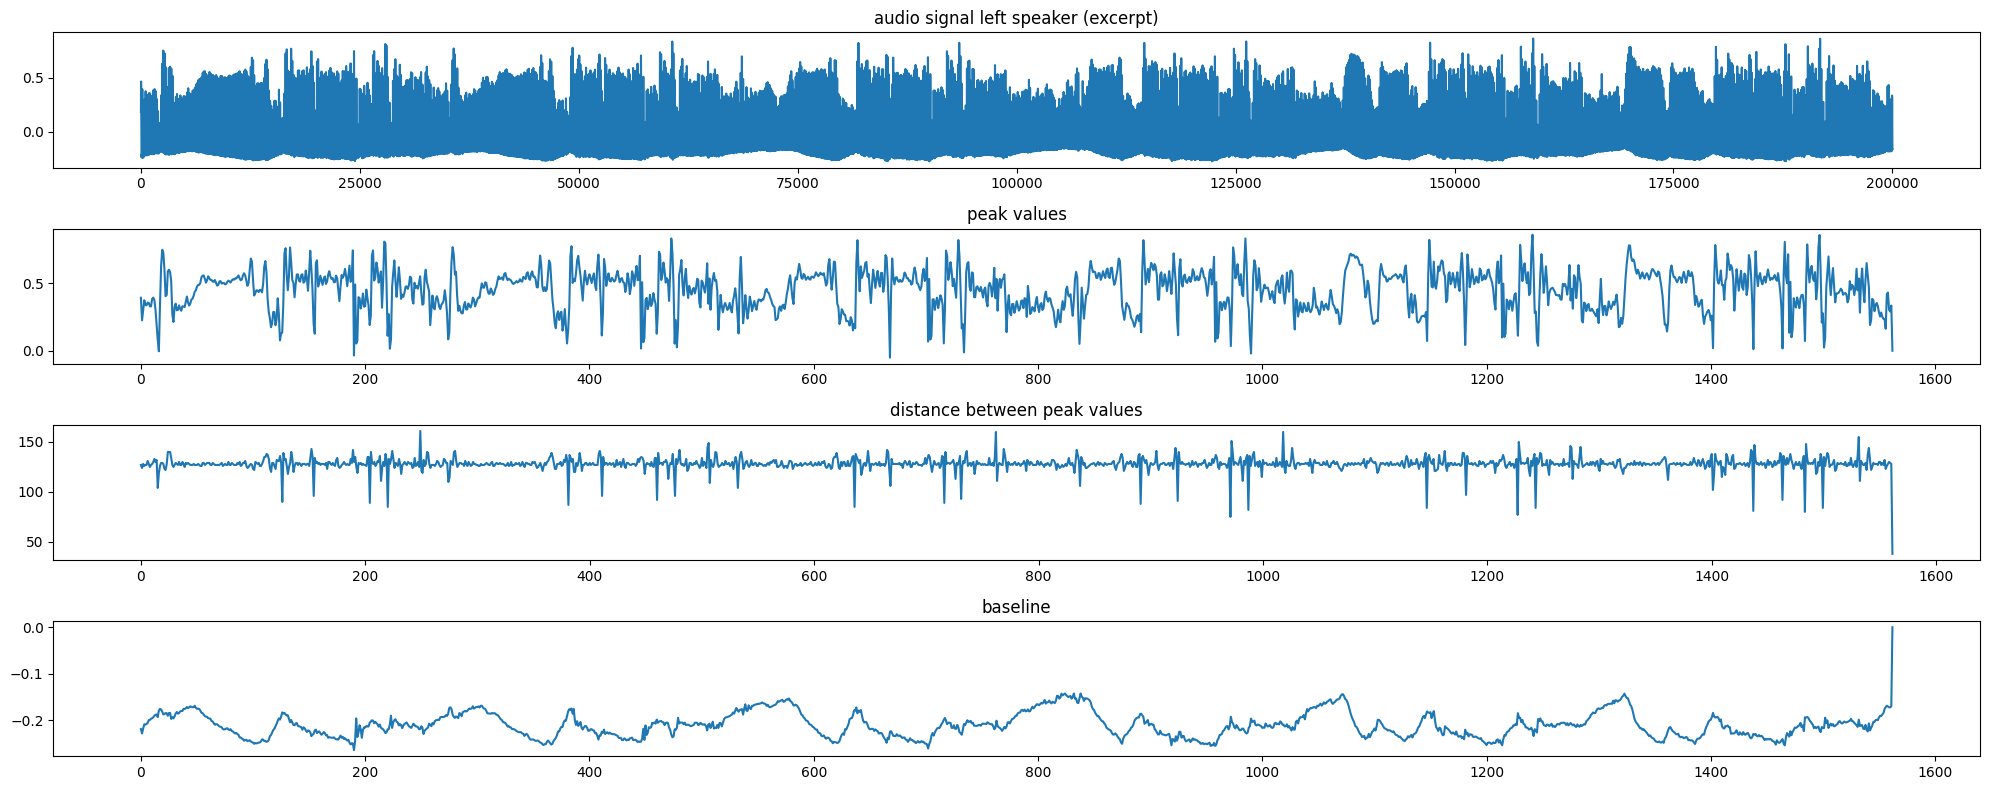

In [13]:
signal = left_audio[200000*10:200000*10+200000]
fig, axs = plt.subplots(nrows = 4, figsize = (20,8))
axs[0].plot(signal)
axs[0].set_title("audio signal left speaker (excerpt)")
peaks, peak_values, baseline_values = extract_peaks(signal, blocksize=128, offset = 64)
axs[1].plot(peak_values)
axs[1].set_title("peak values")
axs[2].plot(-peaks[:-1]+peaks[1:])
axs[2].set_title("distance between peak values")
axs[3].plot(baseline_values)
axs[3].set_title("baseline")
plt.tight_layout()
(-peaks[:-1]+peaks[1:]).mean()


  0%|          | 0/128 [00:00<?, ?it/s]

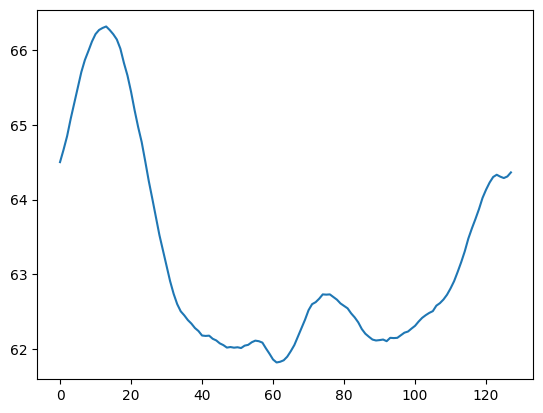

In [18]:
std = np.zeros(128)
for i in tqdm(range(128)):
    peaks, peak_values, baseline_values = extract_peaks(left_audio, blocksize=128, offset = i)
    std[i] = (-peaks[:-1]+peaks[1:]).std()
plt.plot(std)

In [19]:
peaks, peak_values, baseline_values = extract_peaks(left_audio, blocksize=128, offset = 64)

m=2409, n=256, missing=183
m=2409, n=256, missing=183


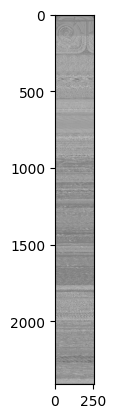

In [38]:
reshaped_pv = reshape_and_pad(peak_values, 256)
reshaped_base = reshape_and_pad(baseline_values, 256)
plt.imshow(reshaped_pv, cmap = "gray")
plt.imsave(f'peaks.png', reshaped_pv, cmap='gray')
plt.imsave(f'baseline.png', reshaped_base, cmap='gray')
plt.imsave(f'both.png', reshaped_pv-reshaped_base, cmap='gray')

In [32]:
reshape_and_pad(np.arange(15), 10)

m=1, n=10, missing=5


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14,  0],
       [ 0,  0],
       [ 0,  0]])